# 导入工具包

In [1]:
import networkx as nx
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
from operator import itemgetter

# 创建无标度网络

In [2]:
# Create a BA model graph - use seed for reproducibility
n = 1000
m = 2
seed = 20532
G = nx.barabasi_albert_graph(n, m, seed=seed)

nx.draw(G)

# 找到degree最大的主节点

In [6]:
# find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

In [7]:
largest_hub

4

In [9]:
degree

88

# 找到主节点为中心的领域子图

In [10]:
nx.ego_graph?

Signature: nx.ego_graph(G, n, radius=1, center=True, undirected=False, distance=None)
Docstring:
Returns induced subgraph of neighbors centered at node n within
a given radius.

Parameters
----------
G : graph
  A NetworkX Graph or DiGraph

n : node
  A single node

radius : number, optional
  Include all neighbors of distance<=radius from n.

center : bool, optional
  If False, do not include center node in graph

undirected : bool, optional
  If True use both in- and out-neighbors of directed graphs.

distance : key, optional
  Use specified edge data key as distance.  For example, setting
  distance='weight' will use the edge weight to measure the
  distance from the node n.

Notes
-----
For directed graphs D this produces the "out" neighborhood
or successors.  If you want the neighborhood of predecessors
first reverse the graph with D.reverse().  If you want both
directions use the keyword argument undirected=True.

Node, edge, and graph attributes are copied to the returned subgra

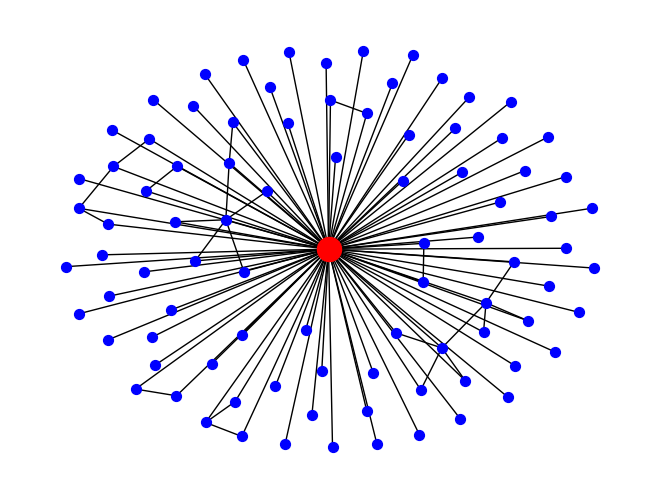

In [11]:
# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego, seed=seed)  # Seed layout for reproducibility
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()